In [1]:
import collections, numpy as np, pandas as pd, matplotlib, matplotlib.pyplot as plt, seaborn as sns, matplotlib_venn, upsetplot
from af2genomics import *

In [2]:
df_ = pd.read_csv('/cluster/work/beltrao/jjaenes/23.10.05_VEP_scores/23.10.13_human_missense_scores.tsv.gz', sep='\t')#, nrows=1000000)
#df_ = read_missense()
df_.head(4).transpose()

/scratch/tmp.53438869.jjaenes/ipykernel_301538/3357938966.py:1: DtypeWarning: Columns (1,3,4,14,15,16,18,19,21,23) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ = pd.read_csv('/cluster/work/beltrao/jjaenes/23.10.05_VEP_scores/23.10.13_human_missense_scores.tsv.gz', sep='\t')#, nrows=1000000)


,0,1,2,3
variant_id,A0A023T6R1/A2C,A0A023T6R1/A2D,A0A023T6R1/A2E,A0A023T6R1/A2F
gene,A0A023T6R1,A0A023T6R1,A0A023T6R1,A0A023T6R1
position,2.0,2.0,2.0,2.0
wildType,A,A,A,A
mutatedType,C,D,E,F
eve,0.262207,0.262207,0.262207,0.262207
pred_ddg,-99.0,-99.0,-99.0,-99.0
plddt,-99.0,-99.0,-99.0,-99.0
sasa,-99.0,-99.0,-99.0,-99.0
pocketscore,-99.0,-99.0,-99.0,-99.0


In [3]:
df_['Overlap'] = [ *map(lambda s, t: s  if s == t and s in ['benign', 'pathogenic'] else 'ambiguous', df_['am_class'], df_['ESM1b_is_pathogenic']) ]

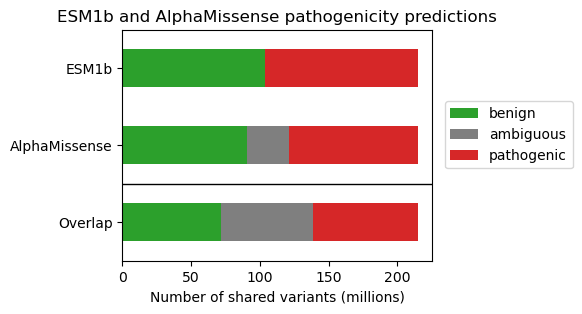

In [4]:
cols_ = ['benign', 'ambiguous', 'pathogenic']

df_q_ = df_.query('am_class == am_class & ESM1b_is_pathogenic == ESM1b_is_pathogenic')
df_plt_ = pd.concat([
    df_q_['ESM1b_is_pathogenic'].value_counts(),
    df_q_['am_class'].value_counts(),
    df_q_['Overlap'].value_counts()], axis=1).transpose()[cols_].rename({
    'am_class': 'AlphaMissense',
    'ESM1b_is_pathogenic': "ESM1b",
}, axis=0).loc[['Overlap', 'AlphaMissense', 'ESM1b']]

df_plt_.plot(kind='barh', stacked=True, figsize=(4, 3), color={'benign': 'tab:green', 'ambiguous': 'tab:gray', 'pathogenic': 'tab:red'})
plt.gca().set_title(f'ESM1b and AlphaMissense pathogenicity predictions')
plt.axhline(0.5, color='k', linewidth=1)
plt.legend(loc=(1.04, 0.4))
plt.gca().set_xticks([0, 50000000, 100000000, 150000000, 200000000])
plt.gca().set_xticklabels([0, 50, 100, 150, 200])
plt.gca().set_xlabel('Number of shared variants (millions)')
plt.savefig('ams_esm1b_pathogenicity_.svg', bbox_inches='tight', transparent=True)